In [ ]:
# import函式庫
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np 

In [ ]:
# 讀入breast cancer資料集
cancer = datasets.load_breast_cancer()
# 定義feature及label
cancer_data = cancer.data
cancer_label = cancer.target

# 顯示breast cancer的內容
print(pd.DataFrame(data=cancer['data'], columns=cancer['feature_names']))

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [ ]:
# 將資料分成training及testing，比例為8:2，並亂序
train_data, test_data, train_label, test_label = train_test_split(cancer_data, cancer_label, test_size=0.2, shuffle=True)

# 前處理，將所有特徵標準化，能夠有效地讓模型快速收斂
# StandardScaler使平均值為0，標準差為1，其他前處理MinMaxScaler:最小值為0最大值為1 MaxAbsScaler:將數據縮放到到[-1,1]之間
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [ ]:
# 使用KNN演算法，k為5
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(train_data,train_label)

KNeighborsClassifier()

In [ ]:
# 輸出預測結果及正確結果
predicted = classifier.predict(test_data)
print('predicted:', predicted)
print('true:     ', test_label)

predicted: [1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1
 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1
 1 0 1]
true:      [1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1
 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1
 1 0 1]


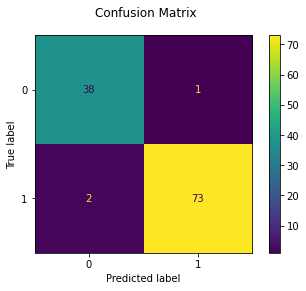

In [ ]:
# 顯示混淆矩陣
disp = metrics.ConfusionMatrixDisplay.from_predictions(test_label, predicted)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

In [ ]:
# 顯示結果報表
# precision = TP/(TP+FP)
# recall = TP/(TP+FN)
# f1-score= 2 * precision * recall/(recision + recall)，為precision和recall的harmonic mean調和平均數
# support為實際手寫數字的總數
print(f"Classification report for classifier {classifier}:\n"
   f"{metrics.classification_report(test_label, predicted)}\n"  )

Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        39
           1       0.99      0.97      0.98        75

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


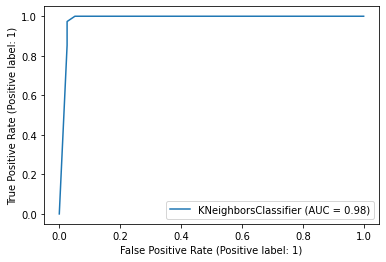

In [ ]:
# 畫出ROC曲線
ROC_curve = metrics.plot_roc_curve(classifier, test_data, test_label)
plt.show()

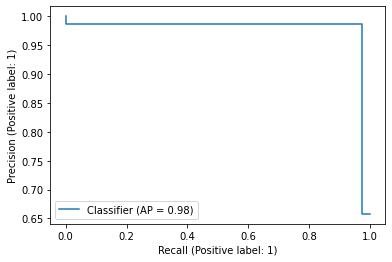

In [ ]:
# 畫出PR曲線
PR_curve = metrics.PrecisionRecallDisplay.from_predictions(test_label, predicted)
plt.show()